# Coursework 2 - Articial Intelligence and Machine Learning
# Practical Component
# Student Name: ROSEMARY ODINAKACHI NNAMDI
# Student Email: RNNAMD300@CALEDONIAN.AC.UK

I confirm that the material contained within the submitted coursework is all my own work unless otherwise stated below.

---


#INTRODUCTION AND PROBLEM STATEMENT


In this coursework, we are analyzing the functionality of traditional machine learning algortithm, SVM to a deep learning neural network of hidden layers.


Support Vector Machine or SVM is a supervised learning that can be applied in classification and regression problems, and it provides correctness including in high dimensional spaces. It works well in two-group classification problems. As a result of its versatility, SVM allows different kernel functions.


Neural networks are artificial systems that are designed to replicate the neural networks in a living creature and it is based on the threshold logic. They are also called Artificial Neural Networks, and they are made up of an input layer, hidden layers and output layer.
Typically, they work by assigning weights immediately the input layer has been assigned, then multiplying the weights by the inputs before summing them. The output is then sent via an activation function, which is used in finding the output. Once the output is more than a specific amount, the node is activated.


**Differences:**
Neural networks are newer versions compared to the SVM that was first proposed in 1992. SVM has different parameters that linearly increase with the rise in the input size, but that can not be said for neural networks. This means that when a neural network has similar number of parameters to an SVM model, it is more complex than the other.

Secondly, SVMs utilize a subset of the input data as part of their training, while neural networks are trained based on the batch of data that it acccesses.


**Source of data:**

The source of the dataset is Twitter, which is a social media platform that is increasingly being used to gather data for analysis. In this tweet.csv, the dataset was scrubbed by the lecturer and given to us in our coursework, and partially cleaned. The sentiment analysis was also done in the csv file before being given to us.

The dataset was gotten from tweets directed at some airlines. Some of them are positive in nature, praising the airline, while others have negative undertone, criticizing the airline.

**Steps Involved**


*   Import necessary modules
*   Data Ingestion
*   Data Pre-processing and cleaning
*   Data Segregation
*   SVM Model Building
*   Neural Network Building

**Problem Statement**

The objective of this task is to detect positive and negative sentiment linked to some tweets. This is Sentiment Analysis, which involves using Machine Learning to find how people are reacting to tweets, topics, products and similar things. The majority of the sentiment analysis has been done in the csv file from the extraction of tweets from Twitter with tweepy module.

Another aim of this analysis is to compare the functionality of SVM to a three-hidden layer neural network and try to see their accuracy levels, and how good their predictions are. 

Module Import

In [204]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt

import nltk 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Data Ingestion**

In this stage, I am uploading the csv file to Google colab.

In [205]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets (3).csv


In [206]:
tweet = pd.read_csv("./Tweets.csv")
tweet.head(10)

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."
5,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
6,positive,"@VirginAmerica it was amazing, and arrived an ..."
7,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...
8,positive,@VirginAmerica This is such a great deal! Alre...
9,positive,@VirginAmerica @virginmedia I'm flying your #f...


From the above, I can see the first ten top rows. From the above, I believe that a label was extracted from the tweets, and a new column was created before the dataset was given to us. The column is the airline sentimenmt, which highlights whether the tweet is positive or negative.

In [207]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   text               11541 non-null  object
dtypes: object(2)
memory usage: 180.5+ KB


I want to get a description of the dataset to see elements like the count, uniqueness, frequency and the top words.

In [208]:
tweet.describe()

,airline_sentiment,text
count,11541,11541
unique,2,11381
top,negative,@AmericanAir thanks
freq,9178,5


In [209]:
tweet.shape

(11541, 2)

In [210]:
tweet.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

From the above, we can see that there is no null value, which goes to show that the null values were filled before being given to us.

#Exploratory Data Analysis




**Finding Common Words**

I want to explore and visualize the pre-cleaned data. To begin, I want to see the common words. I will use Word Cloud module to do this. Start by importing it and specifying the size and color of the chart.

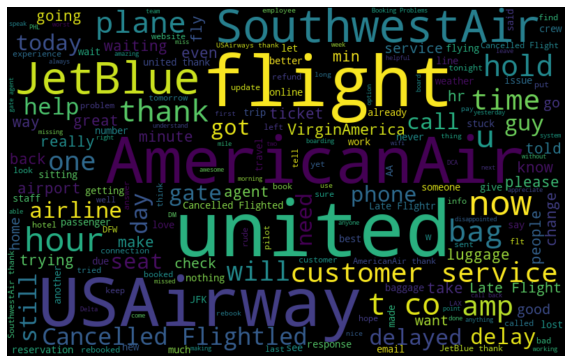

In [211]:
all_words = ' '.join([text for text in tweet['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

From the above, we can see that American Air, flight, USAirway were frequently used words in the tweets. 

**Non-Hateful Words**

I want to see a display of the non-hateful words.

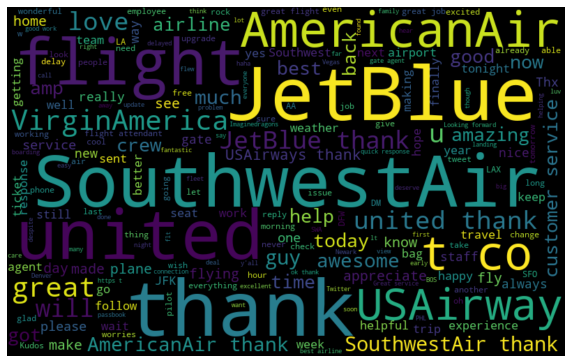

In [212]:
normal_words =' '.join([text for text in tweet['text'][tweet['airline_sentiment'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see that the non-hateful tweets had words such as thank, SouthWestAir, and JetBlue. This could show that users tend to prefer the likes of SOuthWest Air.

**Hateful Tweets**

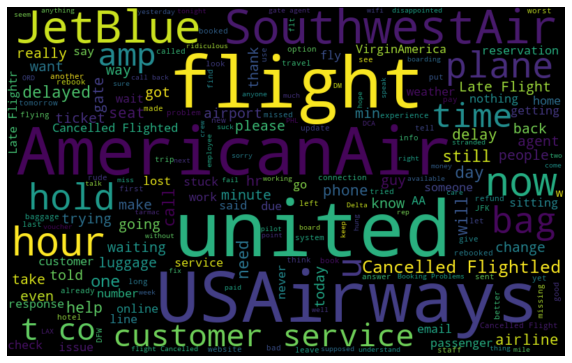

In [213]:
negative_words = ' '.join([text for text in tweet['text'][tweet['airline_sentiment'] == 'negative']])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The airlines with more hateful tweets from this are AmericanAir, USAirways and many of them were linked to cancelled flight.

**Exploring The Hashtags In Tweets With Bar Chart**

The first stage is to define the function that I will use in collecting the hashtags, then looping over the words in the tweet.

Hashtags in tweets usually come after a #.

In [214]:
# defining the function that I want to utilize in collecting the hashtags
def extract_hashtag(x):
    hashtags = []
    # This is for looping over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

This is to extract the hashtags from the positive and negative tweets. Before this can work, I have to impot the module, re.

In [215]:
import re
# getting the hashtags from positive tweets

good_ht = extract_hashtag(tweet['text'][tweet['airline_sentiment'] == 'positive'])

# getting the hashtags from negative tweets
bad_ht = extract_hashtag(tweet['text'][tweet['airline_sentiment'] == 'negative'])

# this is to unnest the list
good_ht = sum(good_ht,[])
bad_ht = sum(bad_ht,[])

**Plotting the hashtags from positive tweets**

I want to plot the ten most frequent hashtags in positive tweets. To do this, I will matplotlib.pyplot and name the x label as hashtag and y label as count.

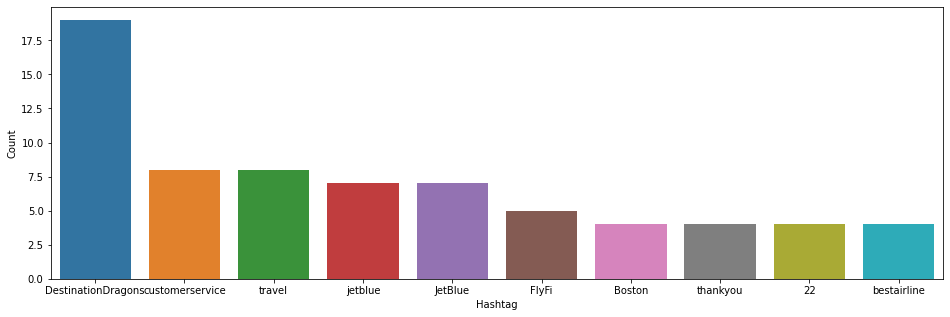

In [216]:
a = nltk.FreqDist(good_ht)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Destination seems to be linked more to positive tweets. As for airline companies, it seems like JetBlue is a hashtag used in positive tweets.

**Illustration of the positive and negative tweets with pie chart**

I want to check how many tweets were positive and negative, then represent the figures in a pie chart.

In [217]:
counts_of_sentiment = tweet.groupby(['airline_sentiment']).size()
print(counts_of_sentiment)

airline_sentiment
negative    9178
positive    2363
dtype: int64


From the above, we can see that negative tweets wer 9178, while positive tweets were 2363. This means that more negative tweets were targeted at airline companies than positive tweets. There must be something wrong that these airlines are doing.

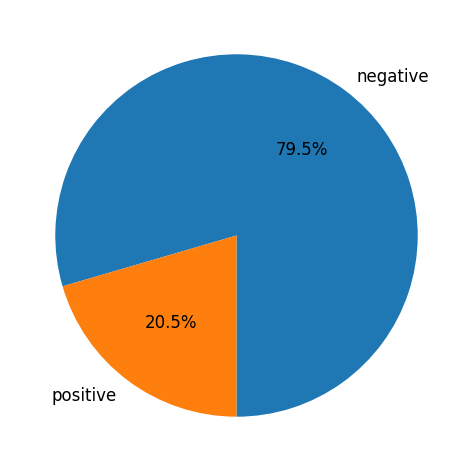

In [218]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
counts_of_sentiment.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

From the above, we can see that negative tweets occupy a 79.5%, while positive tweets are 20.5%. This confirms the above count.

#Data Cleaning and Text Preprocessing Stage

By text preprocessing, I am cleaning the text dataset before I encode and train them. I want to clean the dataset with the steps below because I want to ensure that the model performs accurately. 

Data cleaning involves removing noise that could negatively affect the SVM model and the neural networks such as usernames, emojis, punctuation marks, numbers and stopwords. It also involves tokenization, encoding the airline sentiment column, turning everything into lowercase and using a vectorizer.

**Username Removal**

Before I can remove the username that exist in the dataset, I intend to import the library called re. The module, re will be used in deleting unnecessary characters. Usernames are noise and add no real value to the analysis.

In [219]:
import re

def remove_username(text_text):
  return re.sub('@[\w]+', '', text_text)

tweet['Clean_text'] =  tweet['text'].apply(remove_username)

In [220]:
tweet.head()

,airline_sentiment,text,Clean_text
0,positive,@VirginAmerica plus you've added commercials t...,plus you've added commercials to the experien...
1,negative,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""en..."
2,negative,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it
3,negative,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","yes, nearly every time I fly VX this “ear wor..."


From the above, we can see that the username has been removed.

**Emoji Removal**

Tweets usually have emojis, and I want to remove any that may exist in the dataset.

I am defining the emoji removal and asking to remove from the tweets elements like flags, emoticons, symbols and much more. These are part of the noise removal process.

In [221]:
def emoji_removal(text_text):
    emoji = re.compile("["
                               u"\U0001F600-\U0001F64F"  # This to remove emoticons
                               u"\U0001F300-\U0001F5FF"  # This is to remove symbols and pictographs
                               u"\U0001F680-\U0001F6FF"  # This is to remove transport and map symbols
                               u"\U0001F1E0-\U0001F1FF"  # This is to remove flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji.sub(r'', text_text)

tweet['Clean_text'] =  tweet['Clean_text'].apply(emoji_removal)

**URL Removal**

I want to remove any URL that may be in the tweets. They are noise and not necessary to the analysis.

In [222]:

def remove_url(text_text):
  return re.sub(r'http\S+', '', text_text)

tweet['Clean_text'] =  tweet['Clean_text'].apply(remove_url)


The above code is to done to remove URL from any of the tweets. I first define remove_url and ask that it should remove urls from the dataset and return a new dataset that is free from URLs.

The last line is me creating a new column called Clean text, which will contain the clean version of text.

In [223]:
tweet['Clean_text'].iloc[1]

' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [224]:
tweet.head()

,airline_sentiment,text,Clean_text
0,positive,@VirginAmerica plus you've added commercials t...,plus you've added commercials to the experien...
1,negative,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""en..."
2,negative,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it
3,negative,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","yes, nearly every time I fly VX this “ear wor..."


**Removing Punctuation Marks and Numbers**

The next step that I want to take is to remove punctuatiuin marks and numbers such as fullstop, comma, question marks, astericks, @ and much more.

In the new column that I created called clean_text, I intend to remove any character that is not alphabet from a to z or A to Z.

In [225]:

def remove_marks(text_text):
  return re.sub('[^a-zA-Z]',' ',text_text)

tweet['Clean_text'] =  tweet['Clean_text'].apply(remove_marks)

In [226]:
tweet.head()

,airline_sentiment,text,Clean_text
0,positive,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experien...
1,negative,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious en...
2,negative,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it
3,negative,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay a flight for seats th...
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time I fly VX this ear wor...


From the above, it can be seen that the code worked because there are no punctuation marks and numbers.

**Make everything lowercase**

The next step in cleaning this text dataset is to make every character lowercase.

The first line sees me defining the lowercase.
In the second line below, I am asking to return every string to lowercase.
In the third line, I am applying the lowercase that was defined to the column called Clean_text.

It is important that all the letters are either uppercase or lower case. I decided to make everything lowercase.

In [227]:
def lowercase(text_text):
  return str(text_text).lower()

tweet['Clean_text'] = tweet['Clean_text'].apply(lowercase)

In [228]:
tweet.head()

,airline_sentiment,text,Clean_text
0,positive,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experien...
1,negative,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious en...
2,negative,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it
3,negative,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay a flight for seats th...
4,positive,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time i fly vx this ear wor...


From the above, we can see that it worked. The VirginAmerica was turned to virginamerica.

**Tokenization**

I want to split the text in the Clean_text column to tokens or smaller pieces. To do this, I will use the nltk library.


I will first import the nltk library. In the second line, I am downloading punkt before I can import the word_tokenize that I need to carry out the tokenization process.

By tokienization, I am converting the tweets into words that are being separated by spaces called tokens.

The aim of tokenization in cleaning of text data is to make it easier to develop the  model and allow it to easily understand the meaning in a text based on hoe the words are being arranged.

In [229]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text_text):
  return word_tokenize(text_text)

tweet['Clean_text'] = tweet['Clean_text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [230]:
tweet.head()

,airline_sentiment,text,Clean_text
0,positive,@VirginAmerica plus you've added commercials t...,"[plus, you, ve, added, commercials, to, the, e..."
1,negative,@VirginAmerica it's really aggressive to blast...,"[it, s, really, aggressive, to, blast, obnoxio..."
2,negative,@VirginAmerica and it's a really big bad thing...,"[and, it, s, a, really, big, bad, thing, about..."
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[seriously, would, pay, a, flight, for, seats,..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[yes, nearly, every, time, i, fly, vx, this, e..."


**Elimination of StopWords**

I want to remove common words that are used in the tweets such as 'a', 'an', 'the'and so on. Stopwords are basically common words that people  use in their daily interaction, which add little or nothing to the machine learning model, hence are not important. I am removing them.

This will be done with the help of nltk library. In the second line, I am downloading the stopwords.

Typically, the nltk library has a list of stopwords. I will use the library to clean the stopwords.

In [231]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# The next step is to check the stopwords.

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

After seeing the stopwords in english, the next step is to remove them from the Clean_text column.


In the first line, i am assigning the stopwords that I found in the previous block of code to the stop_words.

I am defining remove_stopwords in the second line and asking the code to return those items in the column called Clean_text that are not stop words.

The last line is asking to remove the stopwords from Clean_text column.

In [232]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(Clean_text):
  return[item for item in Clean_text if item not in stop_words]

tweet['Clean_text'] = tweet['Clean_text'].apply(remove_stopwords)

In [233]:
tweet.head()

,airline_sentiment,text,Clean_text
0,positive,@VirginAmerica plus you've added commercials t...,"[plus, added, commercials, experience, tacky]"
1,negative,@VirginAmerica it's really aggressive to blast...,"[really, aggressive, blast, obnoxious, enterta..."
2,negative,@VirginAmerica and it's a really big bad thing...,"[really, big, bad, thing]"
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[seriously, would, pay, flight, seats, playing..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[yes, nearly, every, time, fly, vx, ear, worm,..."


From the above, we can see that the stopwords have been removed.

**Stemming and Lemmatization**

The next step in cleaning the text data is stemming and lemmatization. By doing stemming, I am eliminating the affixes in a word. The issue with this is that context may not be considered in this process. When I do lemmatization, the context is considered ensuring that words are changed to the base form that makes sense.

They bear some similrities with each other except that the former gives root stem, which may not make meaning to the original word, while the latter gives root word, which is similar to the original word.


Typically, it is preferable to use lemmatization to reduce the distortion of the words. To do this, I will use the WordNetLemmatizer. Before I make this decision, let me compare both.

I am downloading wordnet and omw-1.4 from nltk library.

The first one is lemmatization.

In [234]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

nltk.download('omw-1.4')

# I am creating an instance of WordNetLemmatizer.
lemma=WordNetLemmatizer()

def remove_lemmatizer(Clean_text):

# I am calling the lemmatizer method.
  return[lemma.lemmatize(word=w,pos='v') for w in Clean_text]

tweet['lemmatizer_text'] = tweet['Clean_text'].apply(remove_lemmatizer)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [235]:
tweet.head()

,airline_sentiment,text,Clean_text,lemmatizer_text
0,positive,@VirginAmerica plus you've added commercials t...,"[plus, added, commercials, experience, tacky]","[plus, add, commercials, experience, tacky]"
1,negative,@VirginAmerica it's really aggressive to blast...,"[really, aggressive, blast, obnoxious, enterta...","[really, aggressive, blast, obnoxious, enterta..."
2,negative,@VirginAmerica and it's a really big bad thing...,"[really, big, bad, thing]","[really, big, bad, thing]"
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[seriously, would, pay, flight, seats, playing...","[seriously, would, pay, flight, seat, play, re..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[yes, nearly, every, time, fly, vx, ear, worm,...","[yes, nearly, every, time, fly, vx, ear, worm,..."


In [236]:
tweet['Clean_text'].iloc[1]

['really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guests',
 'faces',
 'amp',
 'little',
 'recourse']

**Stemming**


I am going to define the stemming function below.

In [237]:
ps = nltk.PorterStemmer()

def stemming(Clean_text):
  out_text = [ps.stem(word) for word in Clean_text]
  return  out_text

  # I am calling the stemming function before I pass it through the Clean_text column in the tweet dataframe, then apply the stemming.

tweet['stem_text'] = tweet['Clean_text'].apply(lambda x: stemming(x))

In [238]:
tweet['stem_text'].head()

0                   [plu, ad, commerci, experi, tacki]
1    [realli, aggress, blast, obnoxi, entertain, gu...
2                            [realli, big, bad, thing]
3    [serious, would, pay, flight, seat, play, real...
4    [ye, nearli, everi, time, fli, vx, ear, worm, ...
Name: stem_text, dtype: object

I want to compare both Stemming and Lemmatizer and decide on the one that I want to use. To do this, I will calculate the unique words for both of them.

In [239]:
import itertools
Lemma_words = list(itertools.chain.from_iterable(tweet['lemmatizer_text']))
Stem_words = list(itertools.chain.from_iterable(tweet['stem_text']))

# I want to find the unique tokens range in both

print("Stem Unique words are: "+str(len(set(Stem_words))));
print("Lemma Unique words are: "+str(len(set(Lemma_words))));

Stem Unique words are: 7349
Lemma Unique words are: 8147


From the above, we can see that Stem has lesser unique words, meaning that I am tempted to use the dataset that has Stem in it, which is the stem_text, but I wont.

When I compared the dataset of Stem and Lemmatizer, the latter preserved the base word, while the Stem_text was filled with incomprehensible words, which may defeat the purpose.

I can't apply both stemming and lemmatization to my model, and must choose one. I am opting for the Lemmatizer because the base words are comprehensible unlike its counterpart.

**Eliminate words with less or equal to two characters.**

I want to eliminate those words that have characters of two or less because I believe that they are unnecessary.

I am asking to return those words in Clean_text column that are more than two, while those that are equal or less than two should be removed.

In [240]:
def remove_words(Clean_text):
  return[i for i in Clean_text if len(i) > 2]

tweet['lemmatizer_text'] = tweet['lemmatizer_text'].apply(remove_words)

In [241]:
tweet.head()

,airline_sentiment,text,Clean_text,lemmatizer_text,stem_text
0,positive,@VirginAmerica plus you've added commercials t...,"[plus, added, commercials, experience, tacky]","[plus, add, commercials, experience, tacky]","[plu, ad, commerci, experi, tacki]"
1,negative,@VirginAmerica it's really aggressive to blast...,"[really, aggressive, blast, obnoxious, enterta...","[really, aggressive, blast, obnoxious, enterta...","[realli, aggress, blast, obnoxi, entertain, gu..."
2,negative,@VirginAmerica and it's a really big bad thing...,"[really, big, bad, thing]","[really, big, bad, thing]","[realli, big, bad, thing]"
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[seriously, would, pay, flight, seats, playing...","[seriously, would, pay, flight, seat, play, re...","[serious, would, pay, flight, seat, play, real..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[yes, nearly, every, time, fly, vx, ear, worm,...","[yes, nearly, every, time, fly, ear, worm, away]","[ye, nearli, everi, time, fli, vx, ear, worm, ..."


**Change the tokens to strings**


I want to change the tokens back to the original form, which was string, since I am done with cleaning. Vectorizers do not work on list but on text, that is the reason behind this conversion

In [242]:
def string_conversion(lemmatizer_text):
  return ' '.join(lemmatizer_text)

tweet['lemmatizer_text'] = tweet['lemmatizer_text'].apply(string_conversion)

In [243]:
tweet.head()

,airline_sentiment,text,Clean_text,lemmatizer_text,stem_text
0,positive,@VirginAmerica plus you've added commercials t...,"[plus, added, commercials, experience, tacky]",plus add commercials experience tacky,"[plu, ad, commerci, experi, tacki]"
1,negative,@VirginAmerica it's really aggressive to blast...,"[really, aggressive, blast, obnoxious, enterta...",really aggressive blast obnoxious entertainmen...,"[realli, aggress, blast, obnoxi, entertain, gu..."
2,negative,@VirginAmerica and it's a really big bad thing...,"[really, big, bad, thing]",really big bad thing,"[realli, big, bad, thing]"
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[seriously, would, pay, flight, seats, playing...",seriously would pay flight seat play really ba...,"[serious, would, pay, flight, seat, play, real..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[yes, nearly, every, time, fly, vx, ear, worm,...",yes nearly every time fly ear worm away,"[ye, nearli, everi, time, fli, vx, ear, worm, ..."


**Convert the airline_sentiment column to binary values**


I want to encode the positive and negative values to numerical values by assigning numbers to them. The model can't be trained on non-integer values.

In [244]:

tweet.loc[tweet['airline_sentiment'] == 'positive', 'airline_sentiment'] = 1
tweet.loc[tweet['airline_sentiment'] == 'negative', 'airline_sentiment'] = 2
tweet.head()


,airline_sentiment,text,Clean_text,lemmatizer_text,stem_text
0,1,@VirginAmerica plus you've added commercials t...,"[plus, added, commercials, experience, tacky]",plus add commercials experience tacky,"[plu, ad, commerci, experi, tacki]"
1,2,@VirginAmerica it's really aggressive to blast...,"[really, aggressive, blast, obnoxious, enterta...",really aggressive blast obnoxious entertainmen...,"[realli, aggress, blast, obnoxi, entertain, gu..."
2,2,@VirginAmerica and it's a really big bad thing...,"[really, big, bad, thing]",really big bad thing,"[realli, big, bad, thing]"
3,2,@VirginAmerica seriously would pay $30 a fligh...,"[seriously, would, pay, flight, seats, playing...",seriously would pay flight seat play really ba...,"[serious, would, pay, flight, seat, play, real..."
4,1,"@VirginAmerica yes, nearly every time I fly VX...","[yes, nearly, every, time, fly, vx, ear, worm,...",yes nearly every time fly ear worm away,"[ye, nearli, everi, time, fli, vx, ear, worm, ..."


**Removing the text, Clean text and stem text columns**

At this point, I no longer need the text column, clean text and stem text since I have done all the cleaning in the lemmatizer_text column.

In [245]:
tweet = tweet.drop(columns=['text', 'Clean_text', 'stem_text'])

In [246]:
tweet.head()

,airline_sentiment,lemmatizer_text
0,1,plus add commercials experience tacky
1,2,really aggressive blast obnoxious entertainmen...
2,2,really big bad thing
3,2,seriously would pay flight seat play really ba...
4,1,yes nearly every time fly ear worm away


From the above, we can see that the unnecessary columns have been removed.

#Data Segregation

I want to split the dataset into 80:20 data ratio for train and test sets respectively.

In [247]:
# importing module
from sklearn.model_selection import train_test_split

#I am splitting the two columns ingo x and y
X = tweet.lemmatizer_text
y = tweet.airline_sentiment

# I am converting y into an array
y = np.array(y)

# I want the model to know that y is an integer. Initially, I ran into an error where the SVM model was unable to tell what type y fell under.
y=y.astype('int')

# I am splitting x and y into train and test in the percentage of 80 to 20 respectively.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

X_train.shape, X_test.shape

((9232,), (2309,))

From the above, 9232 was split to X_train, while 2309 was for X_test.

I want to check if it split well

In [248]:
X_train.head()

7150    another dead end handle amp give fail already ...
8316    plane pbi clt know freeze water also saw plane...
8331                           wait bag min phl bag claim
7767    never hear back would help chance could bump f...
916                                                 thank
Name: lemmatizer_text, dtype: object

**Vectorizer**

By vectorizing data, it means I want to convert the text into numbers. I am doing this because machine learning models are designed to understand only numbers and not texts. Vectorization or word embedding means the conversion of text into numbers that are used in building a ML model.

I want to use the Count Vectorizer to transform the dataset.
To do this, I will import the necessary modules and fit the vectoriser.
I want to transform it via the Count Vectorizer.

Count Vectorizer counts how many times a word exists in the document. It works by creating a matrix where every unique word is shown by a column, while every text sample is shown by a row.

If I do not convert the text into numbers, the machine learning model won't work.

In [249]:
from sklearn.feature_extraction.text import CountVectorizer
# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')
# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(X_train) + list(X_test))
# transform documents to document-term matrix
x_train_vec = vectorizer.transform(X_train)
x_test_vec = vectorizer.transform(X_test)

In [250]:
x_train_vec.shape

(9232, 7765)

In [251]:
print(x_train_vec)

  (0, 270)	1
  (0, 1701)	1
  (0, 2185)	1
  (0, 2392)	1
  (0, 3014)	1
  (0, 3992)	1
  (1, 1238)	1
  (1, 2009)	1
  (1, 2681)	1
  (1, 2781)	1
  (1, 3758)	1
  (1, 4718)	1
  (1, 5005)	1
  (1, 5121)	1
  (1, 5920)	1
  (1, 7463)	1
  (2, 567)	1
  (2, 1198)	1
  (2, 4282)	1
  (2, 5068)	1
  (2, 7419)	1
  (3, 920)	1
  (3, 1093)	1
  (3, 1230)	1
  (3, 2555)	1
  :	:
  (9227, 5575)	1
  (9227, 6030)	1
  (9228, 270)	1
  (9228, 2555)	1
  (9228, 3150)	1
  (9228, 3230)	1
  (9228, 4506)	1
  (9228, 7258)	1
  (9229, 2544)	1
  (9229, 2545)	1
  (9229, 4019)	1
  (9230, 173)	1
  (9230, 4765)	1
  (9230, 6742)	1
  (9230, 6778)	1
  (9230, 6906)	1
  (9230, 7258)	1
  (9231, 581)	1
  (9231, 607)	1
  (9231, 884)	1
  (9231, 1018)	1
  (9231, 1236)	1
  (9231, 2376)	1
  (9231, 5015)	1
  (9231, 5758)	1


From the above, we can see that the vectorizer worked. I will then feed the numeric data into the classification algorithm.

#Model Training

For my model training, I will use Support Vector Machine (SVM) and a Neural Network to train the model and compare their results.

**Import necessary modules**

In [252]:
# imports from sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.metrics import classification_report

**SVM**

SVM or Support Vector Machine is a ML algorithm that can be utilized for regression and classification. In this case, it is performing supervised learning for a classification problem. For text classification to work with SVM, it has to be converted into vector of numbers which was done bhy the vectorizer in the previous stage.

The next thing to do is to choose a kernel function. The role of a kernel function is to take the data as input before converting it into the required form.
RBF is a commonly utilized kernel function because it possesses a localized and finite response on the x-axis.
Linear is a kernel function that is utilized when the data is seen as linearly seperable.

I will also use GridSearch to find the ideal parameters for SVM. The tuned parameters show a list of parameters and their ranges such as Kernel, C and Gamma. The ideal parameters that are gotten from the grid search will be fitted to the SVM model.

The model is the SVM classifier and the scoring gives us the accuracy level.

The cv is 5 meaning that cross validation will be used in training the model five times.

The next step is fitting the grid search to the train dataset.

In [253]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2, 3, 4], "C": [1, 10, 100, 1000]},
]
model = SVC()

grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)
grid_search.fit(x_train_vec, y_train)


print("Best parameters:", grid_search.best_params_)



Best parameters: {'C': 1, 'kernel': 'linear'}


From the output, we can see that the Grid Search found the ideal estimators as C= 1, and kernel = linear kernel function.

**Hyperparameter Fitting**



Hperparameters are top level parameters that influence the learning process, as well as the model parameters'values. The aim of the hyperparameters is to control the learning process. Typically, they are external to the model and their values can't be gotten from the dataset.

To improve the accuracy of the model, it is advisable to tune various parameters such as the kernels, C or Regularisation, and degree with the ideal paramaters found during the grid search.

Kernels are used for turning the low dimensional input space to higher ones, while the C or Regularisation shows the error term, telling the optimization process the amount of error that is allowed.





In [254]:
# I want to create a grid searched object for SVM then train it based on the grid search.
print(20*"-"+ "Grid Searched SVM" + 20*"-")
best_svm = SVC(C=1, kernel="linear")

# In this step, I will utilize the hyperparameters to try and fit it to the model.
best_svm.fit(x_train_vec, y_train)

# Getting the results
predictions = best_svm.predict(x_test_vec)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))

# I want to create a baseline object for SVM then train it based on the baseline model.
print(20*"-"+ "Baseline SVM" + 20*"-")
baseline_sv = SVC()

# In this step, I will utilize the hyperparameters to try and fit it to the model.
baseline_sv.fit(x_train_vec, y_train)

# Getting the results
predictions = baseline_sv.predict(x_test_vec)
print("\nPerformance report:\n")
print(classification_report(y_test, predictions))


--------------------Grid Searched SVM--------------------

Performance report:

              precision    recall  f1-score   support

           1       0.76      0.70      0.73       447
           2       0.93      0.95      0.94      1862

    accuracy                           0.90      2309
   macro avg       0.84      0.83      0.83      2309
weighted avg       0.90      0.90      0.90      2309

--------------------Baseline SVM--------------------

Performance report:

              precision    recall  f1-score   support

           1       0.83      0.57      0.68       447
           2       0.91      0.97      0.94      1862

    accuracy                           0.90      2309
   macro avg       0.87      0.77      0.81      2309
weighted avg       0.89      0.90      0.89      2309



In [255]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, normalize='true')

array([[0.57494407, 0.42505593],
       [0.0273899 , 0.9726101 ]])

The True Positive is 0.575. This means the model predicted true and it is actually true.

The True Negative is 0.425. This means the model predicted false and it is actually false.

The False Positive is 0.027. This means the model predicted true and it is actually false.

The False Negative is 0.97. This means the model predicted false and it is actually false.

**GridSearchCV and Baseline**

GridSearchCV is a cross validation library that is used in finding out the appropriate hyperparameter values through the process of hyperparamater tuning. It makes it easier to find hyperparameters. in this case, it is carrying out hyperparameter optimization for SVM using the test dataset.

The baseline model is the reference model in this project, which I will compare the GridSearch to.

I want to compare the results of the grid search and baseline SVM models. From the above, we can see that the accuracy of the GridSearch SVM model is 0.90, which is good. For baseline SVM, it has accuracy of 0.90, which is the same as  what was obtained in Grid searched SVM.

The precision score in Grid Search is better than what is obtainable in baseline model at 93% and 91% respectively. This means that the prediction of the GridSearch model is correct about 93% of the time, while that of baseline model is correct about 91% of the time.

The recall is 97% and 95% for grid search and baseline model. 
Recall score measures the performance of the model by measuring the count of true positives. By using both precision andn recall score, one can tell the performance of the model in predicting if the classes are not balanced.

The f-1 score is the same for both models. The higher the f-1 score or the harmonic mean of precision and recall scores, the better the classifier. At 90%, the f-1 score is high.


Macro-avg is the arithmetic mean of the f1-scores in both categories. Typically, the category with more support have higher scores because they can easily catch rarer categories. Here, the Grid Search has a higher macro avg score for f-1 compared to the baseline model.

The weighted average is the precision of every class merged together. It takes the mean of every per-class F1 scores. It is higher in the GridSearch model.

Support represents how many times a class occurred in the dataset.

**Neural Network**

Typically, a neural network has three layers, which are input layer, hidden layer and output layer. The input layer receives the input, the hidden layer carries out the necessary computations while the output layer makes the predictions.

As requested in the coursework guidelines, I have decided to create a neural network with three hidden layers.

In [256]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tf_datasets
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.metrics import classification_report

The input layer has 7765 input varables, which I found after I got an error. I am using a fully connected network that has three hidden layers. It also has an input and output layer. Typically, one can spot a fully connected layer based on the Dense class.

The activation function for my first and second layers is relu or rectified linear unit activation function, while I will use softmax function in my output layer.
Hidden layers allow neural networks to capture complex relationships and peform well. 

Activation function allows the network to learn complex trends and patterns in the input data. It incorporates non linearity into the network. It decides if a neuron should be activated or not based on if it feels the input of the neuron is important or not. The aim of an activation function is to convert the summed weighted input to an output that is sent to the next hidden layer. 

ReLU or Rectified Linear Unit is a type of activation function that is widely utilized because it does not lead to Vanishing Gradient Problem and saturation. It does not activate every neuron simultaneously. By doing this, it is more efficient compared to the likes of tanh and sigmoid. 

When choosing an activation function, one has to consider potential issues such as vanishing and exploding gradients. This was why ReLU was chosen.

Sequential means that the model is being created sequentially, meaning that the output of every layer that is added is the input of the next layer.

The model.add() function is used to add a layer to the network. 

Dense shows that it is a fully connected layer. The arguments in the code cell below shows that the output dimension is 16. The output dimension for the second layer is also 12, while the the output dimension for the third hidden layer is 10.

The first hidden layer has sixteen nodes and utilizes the relu activation function. 

The second hidden layer has twelve nodes and also utilizes the relu activation function.

The third hidden layer has ten nodes and also utilizes the relu activation function.

Output layer accesses the information that was extracted by the hidden layer, and brings the results.
The output layer has three nodes and utilizes softmax activation function.
The Softmax activation function creates a probability distribution between all three outputs. It can be likened to sigmoid, producing a range of 0-1, which is why it is utilized in the final layer.



In [257]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7765, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                124256    
                                                                 
 dense_5 (Dense)             (None, 12)                204       
                                                                 
 dense_6 (Dense)             (None, 10)                130       
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 124,623
Trainable params: 124,623
Non-trainable params: 0
_________________________________________________________________


**Model Compilation**

The next step is to compile the keras model. Compilation is the stage where the model is being prepared for training. Some elements must be specified during this stage such as the loss function, which in this, I will use the categorical_crossentropy to evaluate the set of weights. 


Loss function is the prediction error of Neural net. I used sparse categorical entropy when I realized that categorical cross entropy was not working. I realized that if I didnt change my labels to one hot encoded labels, I could not use the categorical entropy as my loss function.
Categorical cross entropy as a loss function is meant for labels that are one hot encoded.

Since I did integer encoding for my labels, it was important I used sparse categorical cross entropy.

Another element that has to be defined is the optimizer that will be utilized in searching through the different weights in the network. In this case, adam, which is different from the classic stochastic gradient descent algorithm will be used. This was used because it can tune itself automatically.

The classis stochastic gradient descent uses a single learning rate, which does not change while training goes on.
Adam, on the other hand, combines the perks of Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation.

The optimization algorithm is adam that can be utilized in gradient descent, and uses less memory.

I am using the metrics argument to display the accuracy since it is classification. I want to see how accurate the model is.



In [258]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Fitting


After I am done defining and compiling the model, I have decided to execute or train or fit the model using data. The fit() function allows me o train the model with some data.

When training is done, it occurs in epochs, which represents how many times the model scans through the different rows in the dataset. Epoch is divided into batch sizes. Batches are the different samples the model considers during an epoch before it updates its weights.

Here, the epoch is 50 to reduce training time. The disadvantage of this is that it may lead to a risk of underfitting or training for a little time.

The batch size is set at 4 to reduce the memory space that is utilized.


In [259]:
# fitting the model on the dataset.

history = model.fit(x=x_train_vec, y=y_train, epochs=50, batch_size=4)

Epoch 1/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.2952 - accuracy: 0.8882
Epoch 2/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.1449 - accuracy: 0.9455
Epoch 3/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0895 - accuracy: 0.9669
Epoch 4/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0601 - accuracy: 0.9783
Epoch 5/50
2308/2308 [==============================] - 8s 4ms/step - loss: 0.0400 - accuracy: 0.9866
Epoch 6/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0302 - accuracy: 0.9890
Epoch 7/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0231 - accuracy: 0.9920
Epoch 8/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0175 - accuracy: 0.9939
Epoch 9/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0152 - accuracy: 0.9946
Epoch 10/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.012

**Visualization**

from the above, the model trained for 50 epochs, and I want to visualize the training loss and accuracy levels.



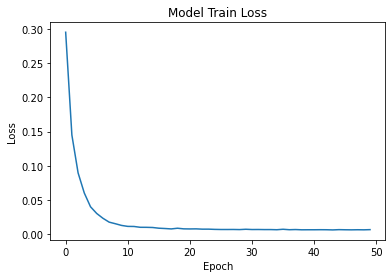

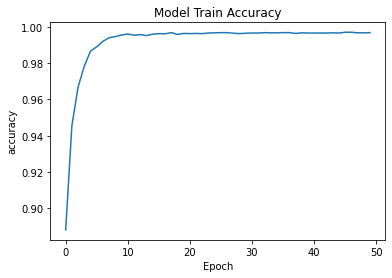

In [260]:
plt.plot(history.history['loss'])
plt.title('Model Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(history.history['accuracy'])
plt.title('Model Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

The training loss is below 0.0066, while the accuracy level is 0.9969. The training loss shows how the model fits the training data. A lower level of training loss, which in this case is 0.0064 shows that the model fits the training data well.

Accuracy metric measures the performance of the model, as it measures the level of accuracy that the model predicts. Here, the accuracy level is 0.9968 or 99.68%.

**Clear The Session**

Before I can do the optimized version of the neural network with callback, I have to clear the session. This is because before I can rerun .fit() method, I have to clear the session.

In [262]:
from keras.backend import clear_session
clear_session()

**Optimizing the Three Hidden Layers Neural Network**

There are different ways to optimize a neural network such as through hyperparameters such as random search, gridsearch and so on.

Another way to optimize a neural network is through the use of callbacks.

I want to use call backs to optimize the network. Callbacks are objects that are called continously in the training of the neural network to correct some behaviours in the network. 

Callbacks are used to automate some controls during training. In this case, I want to stop training when a certain loss and accuracy score has been reached.

Overfitting is an issue for neural networks and the use of callbacks like Early Stopping function.

Early Stopping function has some metrics that allow me to choose when training time should stop to reduce the risk of overfitting.

**Creating the model for the optimized network**

In [263]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(7765, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                124256    
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 124,623
Trainable params: 124,623
Non-trainable params: 0
_________________________________________________________________


The ReduceLROnPlateau is function that reduces learning rate when a metric is no longer improving. Popular metrics include monitor, patience and cooldown.

Monitor is what I want to be monitored such as loss. The patience refers to the number of epochs if there is no improvement, the training will end. 
Cooldown represents the number of epochs to wait before normal operation can start after the lr has faced reduction.


The EarlyStopping callback has several metrics such as the metric to monitor, and in this case, it is accuracy.

The min_delta or the minimum change in the monitored value.

The patience refers to the number of epochs if there is no improvement, the training will end. 

In [264]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='loss', patience=5, cooldown=0),
             EarlyStopping(monitor='accuracy', min_delta=1e-4, patience=5)]

**Compiling the optimized model**

In [265]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fitting the optimized model**

In [266]:
# fitting the model on the dataset.

history = model.fit(x=x_train_vec, y=y_train, epochs=50, callbacks=callbacks, batch_size=4)

Epoch 1/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.3053 - accuracy: 0.8831 - lr: 0.0010
Epoch 2/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.1493 - accuracy: 0.9416 - lr: 0.0010
Epoch 3/50
2308/2308 [==============================] - 8s 4ms/step - loss: 0.0986 - accuracy: 0.9647 - lr: 0.0010
Epoch 4/50
2308/2308 [==============================] - 8s 4ms/step - loss: 0.0696 - accuracy: 0.9755 - lr: 0.0010
Epoch 5/50
2308/2308 [==============================] - 8s 4ms/step - loss: 0.0472 - accuracy: 0.9830 - lr: 0.0010
Epoch 6/50
2308/2308 [==============================] - 8s 4ms/step - loss: 0.0356 - accuracy: 0.9870 - lr: 0.0010
Epoch 7/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0269 - accuracy: 0.9901 - lr: 0.0010
Epoch 8/50
2308/2308 [==============================] - 9s 4ms/step - loss: 0.0198 - accuracy: 0.9926 - lr: 0.0010
Epoch 9/50
2308/2308 [==============================] - 8s 4ms/step - loss: 0.01

To stop overfitting, the call back ended the training session at the thirty seventh epoch with an accuracy of 99.7% and loss of 0.0061.

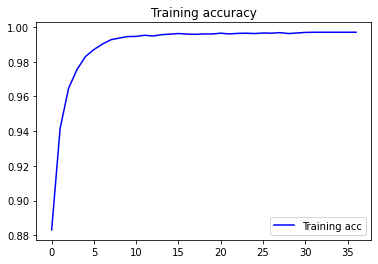

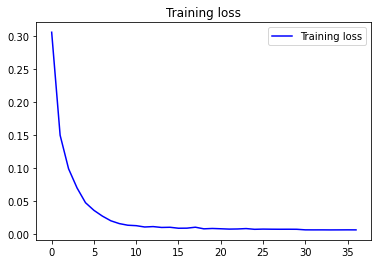

In [267]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')

plt.legend()

plt.show()

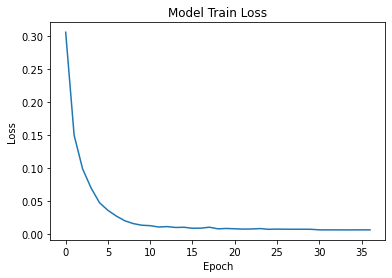

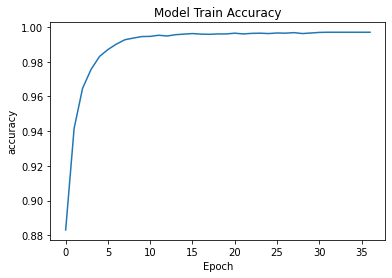

In [268]:
plt.plot(history.history['loss'])
plt.title('Model Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(history.history['accuracy'])
plt.title('Model Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

The baseline neural network had a training accuracy and loss of 99.68% and 0.0065 respectively.

The optimized neural network had a training accuracy and loss of 99.7% and 0.006 respectively

#Model Evaluation

Like stated in the introduction, one of the objectives of this coursework is to compare the functionalities of SVM and Neural Networks.


**SVM and Neural Network**

There are two models for the SVM, which are the baseline model and the gridsearch model.

The outcomes of both were discussed above. I want to compare the gridsearch SVM model to the optimized neural network model.

The gridsearch SVM has an accuracy of 90%, while the optimized neural network had an accuracy of 99.7%. This means that the neural network performed better than the SVM model.



**Sources:**

Comprehensive Hands on Guide to Twitter Sentiment Analysis with dataset and code
https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

Hyperparameter Tuning With Deep Learning Grid Search

https://medium.datadriveninvestor.com/hyperparameter-tuning-with-deep-learning-grid-search-8630aa45b2da

Twitter Sentiment Analysis using Word2Vec, BiLSTM
https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-using-word2vec-bilstm

Performing Twitter Sentiment Analysis for Beginner

https://lamiae-hana.medium.com/performing-twitter-sentiment-analysis-for-beginner-925b31131969


Twitter Sentiment Analysis: A NLP Use Case For Beginners
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

Twitter Sentiment Analysis With NLP

https://www.kaggle.com/code/durgeshrao9993/twitter-sentiment-analysis-with-nlp

Text Preprocessing in NLP with Python
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

Text Preprocessing for NLP
https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95


